Import the **_nmrlineshapeanalyser_** library

In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append("../../src")
from nmrlineshapeanalyser.core import NMRProcessor

Create **_NMRProcessor_** object

In [2]:
processor = NMRProcessor()

Load filepath

**_nmrlineshapeanalyser_** supports an already processed Bruker data. It does not support data from any other brand at the moment. You might want to check [NMRglue](https://pypi.org/project/nmrglue/) on how to go about that.

filepath has the following format: bruker's processed data path (10\pdata\1) + "\\\\". It is pertinent to leave the "\\\\" at the end of the filepath.

In [3]:
filepath = r"..\..\data\single_peak\10\pdata\1\\"

Load the data

In [4]:
processor.load_data(filepath)

Select the region of interest: (lower_value, higher_value)

In [5]:
x_data, y_data = processor.select_region(512, 650)

Normalize the data and return normalised y_axis and the corresponding x_axis

In [6]:
x_data, y_normalized = processor.normalize_data(x_data, y_data)

define initial parameters for the fitting

this example is for a single peak

format of the parameters is [x0, amplitude, width, eta, offset]

x0 has to be close to the peak position

In [7]:
initial_params = [
581, 0.12, 40.51, 0.89, -1 
  ]

fixed_x0 controls whether peak positions should be fixed during fitting

False means position can vary, True means position is fixed

In [8]:
number_of_peaks = 1

fixed_x0 = [False] * number_of_peaks

Fit the data

In [9]:
popt, metrics, fitted = processor.fit_peaks(x_data, y_normalized, initial_params, fixed_x0)

popt is the optimized parameters

metrics is the metrics of the fitting

fitted is the fitted curve data

Plot and examine the results of the fitting

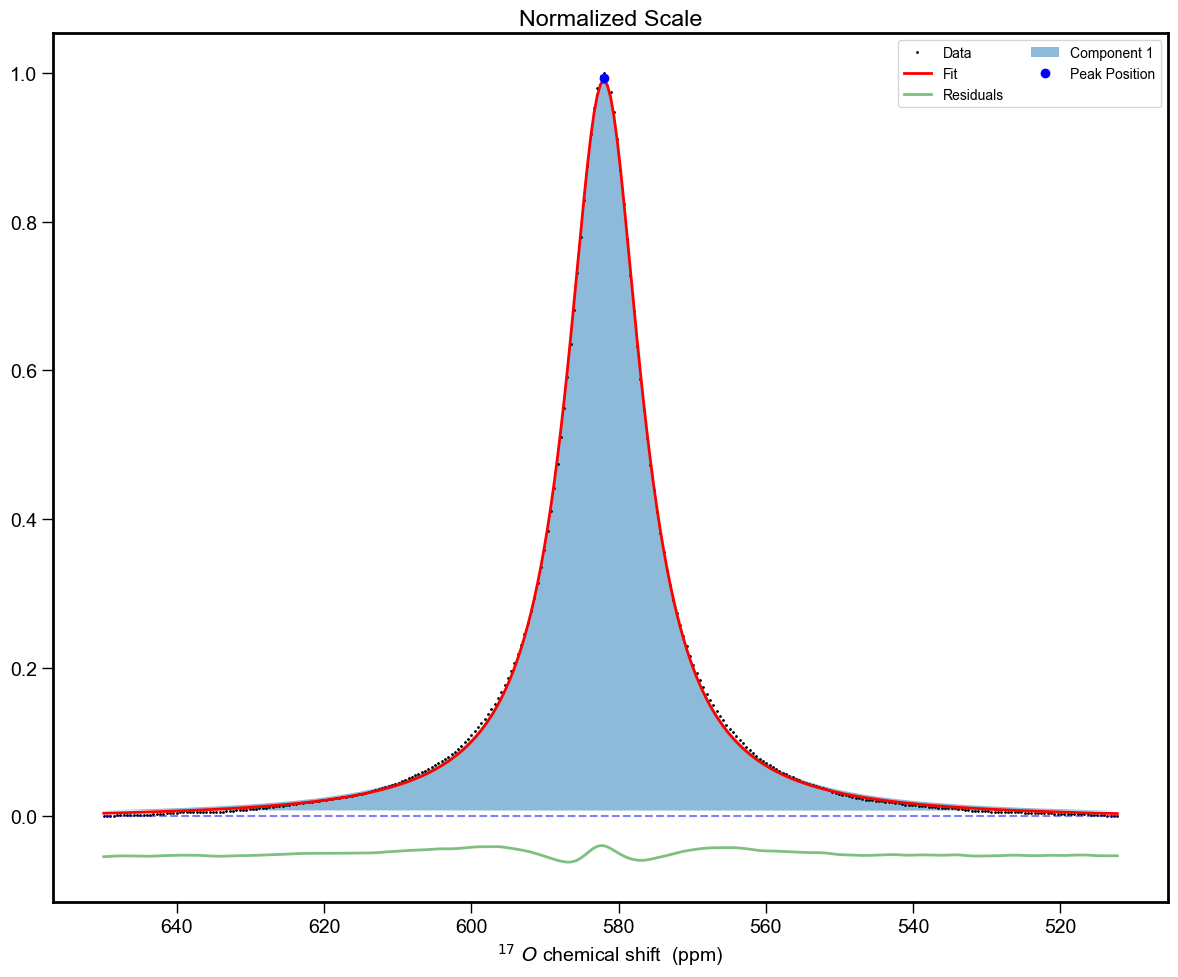

In [10]:
fig, axes, components = processor.plot_results(x_data, y_normalized, fitted, popt)

Save the figure as png file and the results as a csv file

In [11]:
processor.save_results(filepath, x_data, y_normalized, fitted, metrics, popt, components)


Peak Fitting Results:

Peak 1 (Position: 582.01 ± 0.01):
Amplitude: 0.993 ± 0.002
Width: 12.33 ± 0.03 in ppm
Width: 835.74 ± 2.36 in Hz
Eta: 1.00 ± 0.01
Offset: -0.004 ± 0.000
Gaussian Area: 0.00 ± 0.10
Lorentzian Area: 19.23 ± 0.16
Total Area: 19.23 ± 0.19
--------------------------------------------------
Peak 1 Percentage is 100.00% ± 1.39%
Overall Percentage is 100.00% ± 1.39%
